In [17]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\mamth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import ast 
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt
#from matplotlib.ticker import FunctionFormatter

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\mamth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 245.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 245.8 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/294.9 kB 328.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 425.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 551.6 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 551.6 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/294.9 kB 546.1 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/294.9 kB 546.1 kB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\mamth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import seaborn as sns

In [8]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] =='United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [5]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [6]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_US_group.sort_values(by ='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by ='count', ascending = False).head(10).sort_values(by ='median', ascending=False).head(10)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


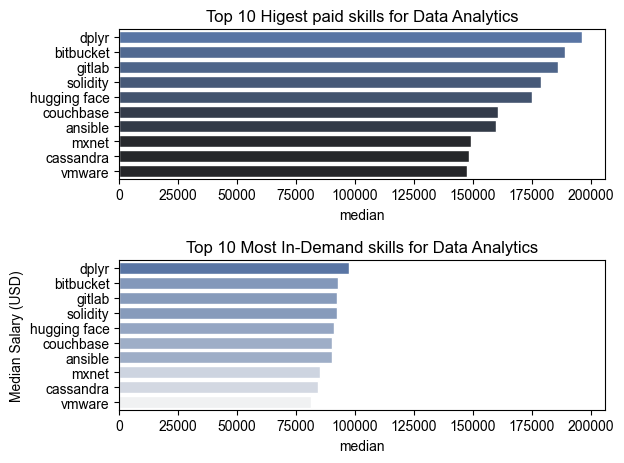

In [22]:
fig, ax =plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data = df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b')
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Higest paid skills for Data Analytics')
ax[0].set_ylabel('')
ax[0].set_ylabel('')
ax[0].legend().remove()
#ax[0].xaxis.set_major_formatter(plt.FunctionFormatter(lambda x, _: f'$(int(x/1000))k'))

sns.barplot(data = df_DA_skills, x='median', y=df_DA_top_pay.index, ax=ax[1], hue='median', palette='light:b')
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand skills for Data Analytics')
ax[1].set_ylabel('')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()

fig.tight_layout()

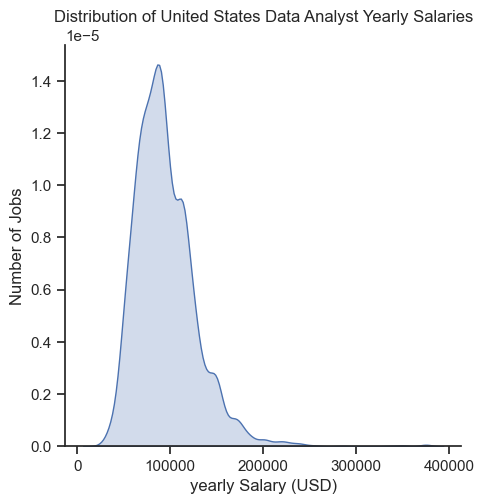

In [26]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax=plt.gca()
plt.show()

C:\Users\mamth\AppData\Local\Temp\ipykernel_12104\13185138.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
C:\Users\mamth\AppData\Local\Temp\ipykernel_12104\13185138.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
C:\Users\mamth\AppData\Local\Temp\ipykernel_12104\13185138.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  job_list = [df_US[df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


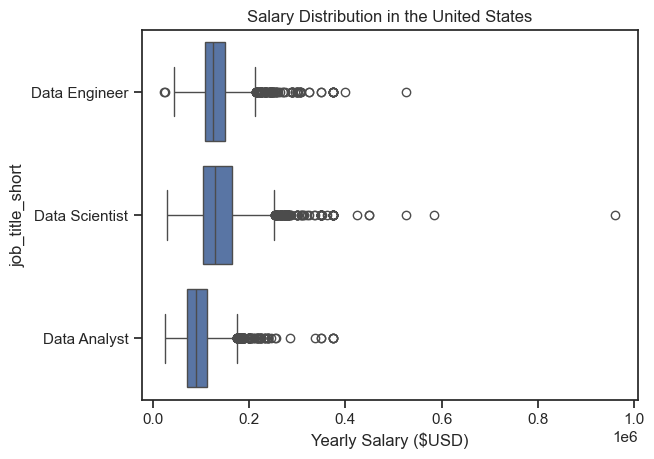

In [31]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] =='United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
#plt.xlim(0,600000)
#plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()